Title: Bike Details Dataset

Qns-1 What is the range of selling prices in the dataset?

In [11]:
#Ans
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Load the CSV file
df = pd.read_csv("BIKE DETAILS.csv")

# Calculate the minimum and maximum selling price
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()

# Calculate the price range
price_range = max_price - min_price

# Display the results
print("Minimum selling price:", min_price)
print("Maximum selling price:", max_price)
print("Price range:", price_range)


Saving BIKE DETAILS.csv to BIKE DETAILS.csv
Minimum selling price: 5000
Maximum selling price: 760000
Price range: 755000


Qns-2 What is the median selling price for bikes in the dataset?

In [12]:
#Ans

# Calculate the median selling price
median_price = df['selling_price'].median()
median_price


45000.0

Qns-3 What is the most common seller type?

In [14]:
#Ans
import pandas as pd
pd.read_csv("BIKE DETAILS.csv")

# Find the most common seller type
most_common_seller_type = df['seller_type'].mode()[0]
most_common_seller_type


'Individual'

Qns4 How many bikes have driven more than 50,000 kilometers?

In [15]:
#Ans
# Count the number of bikes with more than 50,000 km driven
high_km_bikes_count = df[df['km_driven'] > 50000].shape[0]
high_km_bikes_count


170

Qns5  What is the average km_driven value for each ownership type?

In [16]:
#Ans
# Calculate the average km_driven value for each ownership type
average_km_driven = df.groupby('owner')['km_driven'].mean()
average_km_driven

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


Qns6  What proportion of bikes are from the year 2015 or older?

In [17]:
#Ans

import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Filter bikes from 2015 or earlier
older_bikes = df[df['year'] <= 2015]

# Calculate the proportion
proportion = len(older_bikes) / len(df)

# Display result as a percentage
print("Proportion of bikes from 2015 or older:", proportion)
print("As a percentage:", round(proportion * 100, 2), "%")


Proportion of bikes from 2015 or older: 0.5664467483506126
As a percentage: 56.64 %


Qns7 What is the trend of missing values across the dataset?

In [18]:
#Ans
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Check for missing values
missing_values = df.isnull().sum()

# Calculate percentage of missing values
missing_percent = (missing_values / len(df)) * 100

# Combine and display
missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': round(missing_percent, 2)
})

print(missing_report)


                   Missing Values  Percentage (%)
name                            0             0.0
selling_price                   0             0.0
year                            0             0.0
seller_type                     0             0.0
owner                           0             0.0
km_driven                       0             0.0
ex_showroom_price             435            41.0


Qns8 What is the highest ex_showroom_price recorded, and for which bike?

In [19]:
#Ans

import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Drop rows where ex_showroom_price is missing
df_clean = df.dropna(subset=['ex_showroom_price'])

# Find the row with the maximum ex_showroom_price
max_price_row = df_clean[df_clean['ex_showroom_price'] == df_clean['ex_showroom_price'].max()]

# Display the bike name and price
bike_name = max_price_row['name'].values[0]
max_price = max_price_row['ex_showroom_price'].values[0]

print("Bike with highest ex-showroom price:", bike_name)
print("Ex-showroom price:", max_price)


Bike with highest ex-showroom price: Harley-Davidson Street Bob
Ex-showroom price: 1278000.0


Qns-9 What is the total number of bikes listed by each seller type?

In [20]:
#Ans
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Count the number of listings for each seller type
seller_counts = df['seller_type'].value_counts()

print(seller_counts)


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


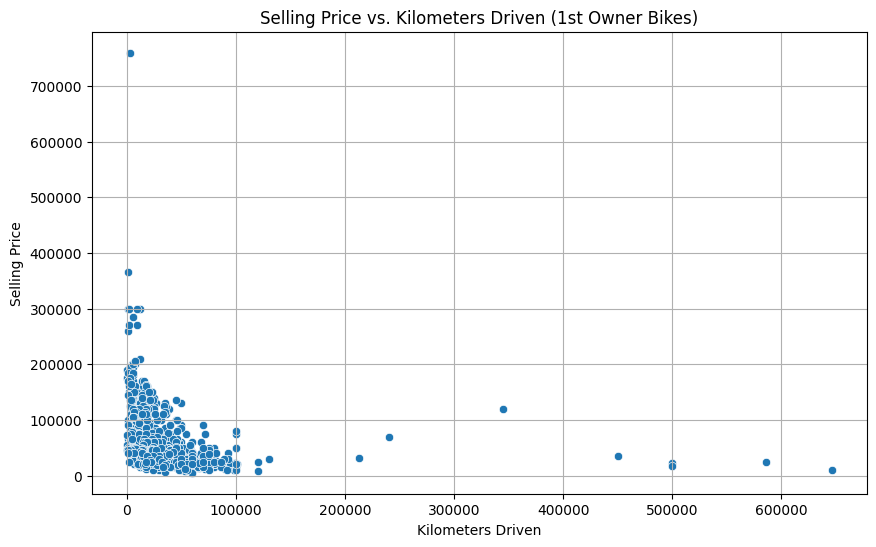

In [21]:
#Qns10 What is the relationship between selling_price and km_driven for first-owner bikes?

#Ans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Filter for first-owner bikes
first_owner_df = df[df['owner'].str.lower() == '1st owner']

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_df, x='km_driven', y='selling_price')
plt.title('Selling Price vs. Kilometers Driven (1st Owner Bikes)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


In [22]:
#qns11- Identify and remove outliers in the km_driven column using the IQR method?

#Ans

import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Calculate Q1 and Q3 for km_driven
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Display result
print(f"Original dataset size: {len(df)}")
print(f"After removing outliers: {len(df_no_outliers)}")


Original dataset size: 1061
After removing outliers: 1022


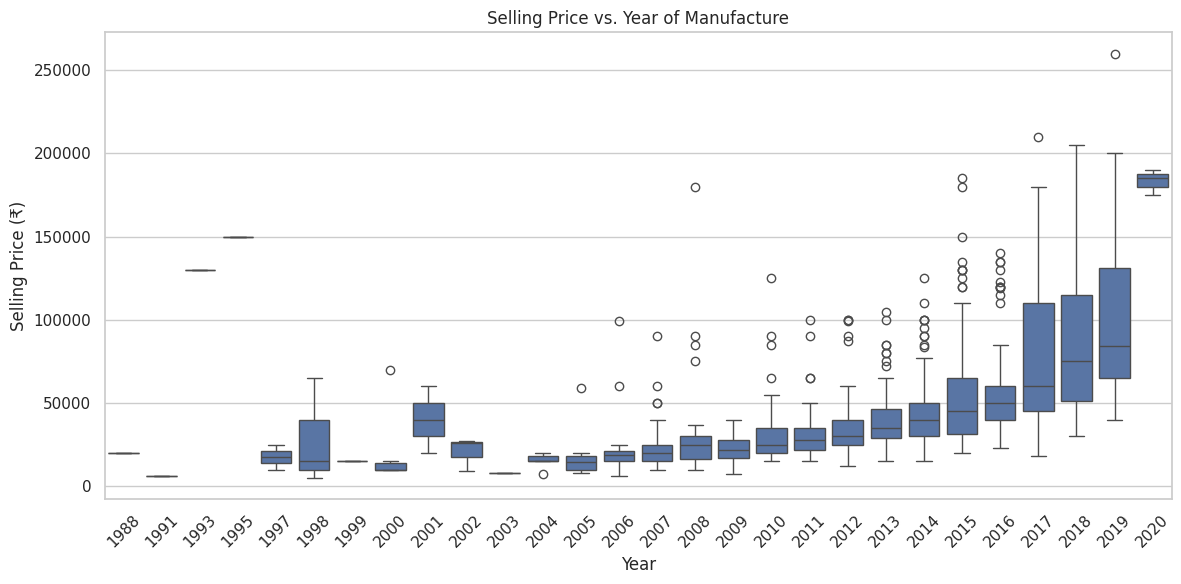

In [23]:
#Qns-12  Perform a bivariate analysis to visualize the relationship between year and selling_price?
#Ans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Optional: filter extreme outliers for better visualization
df_filtered = df[df['selling_price'] < df['selling_price'].quantile(0.99)]

# Set plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='year', y='selling_price')
plt.xticks(rotation=45)
plt.title('Selling Price vs. Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Selling Price (₹)')
plt.tight_layout()
plt.show()


Qns-13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [24]:
#Ans

import pandas as pd

# Set display options for better readability
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('BIKE DETAILS.csv')

# Calculate bike_age based on the current year (2025)
df['bike_age'] = 2025 - df['year']

# Calculate depreciation
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

# Calculate the average depreciation for each bike_age
average_depreciation = df.groupby('bike_age')['depreciation'].mean().reset_index()

# Sort the results by bike_age
average_depreciation = average_depreciation.sort_values(by='bike_age')

# Display the average depreciation
print(average_depreciation.to_markdown(index=False, numalign="left", stralign="left"))

| bike_age   | depreciation   |
|:-----------|:---------------|
| 5          | -34260         |
| 6          | 2954.56        |
| 7          | 13023.2        |
| 8          | 22306.1        |
| 9          | 28328.2        |
| 10         | 28013.3        |
| 11         | 34505.6        |
| 12         | 43086.9        |
| 13         | 37317.6        |
| 14         | 47102.7        |
| 15         | 45658.9        |
| 16         | 38227.8        |
| 17         | 54732.4        |
| 18         | 42399          |
| 19         | 39664.5        |
| 20         | 44852          |
| 21         | 36852          |
| 22         | nan            |
| 23         | nan            |
| 24         | 34852          |
| 25         | nan            |
| 26         | nan            |
| 27         | nan            |
| 28         | nan            |
| 30         | nan            |
| 32         | nan            |
| 34         | nan            |
| 37         | nan            |


Qns-14  Which bike names are priced significantly above the average price for their manufacturing year?

In [25]:
#Ans

# Calculate the average selling price and standard deviation for each year
yearly_stats = df.groupby('year')['selling_price'].agg(['mean', 'std']).reset_index()
yearly_stats.rename(columns={'mean': 'avg_selling_price_year', 'std': 'std_selling_price_year'}, inplace=True)

# Merge the yearly stats back into the original DataFrame
df = pd.merge(df, yearly_stats, on='year', how='left')

threshold_std = 1.5

# Identify bikes priced significantly above the average for their manufacturing year
# Considering 1.5 standard deviations above the mean
significantly_above_average = df[df['selling_price'] > (df['avg_selling_price_year'] + threshold_std * df['std_selling_price_year'])]

# Select and display the relevant columns
result = significantly_above_average[['name', 'selling_price', 'year', 'avg_selling_price_year', 'std_selling_price_year']]

print("Bikes priced significantly above the average for their manufacturing year:")
print(result.to_markdown(index=False, numalign="left", stralign="left"))

Bikes priced significantly above the average for their manufacturing year:
| name                                       | selling_price   | year   | avg_selling_price_year   | std_selling_price_year   |
|:-------------------------------------------|:----------------|:-------|:-------------------------|:-------------------------|
| Royal Enfield Bullet 350 [2007-2011]       | 180000          | 2008   | 34289.3                  | 35197.3                  |
| Yamaha YZF R3                              | 365000          | 2019   | 119690                   | 96703.4                  |
| Honda CBR-250R                             | 120000          | 2016   | 58469                    | 36006.2                  |
| KTM 390 Duke                               | 175000          | 2017   | 78894.7                  | 50627.9                  |
| Royal Enfield Electra 5 S                  | 90000           | 2010   | 31793.3                  | 19387.3                  |
| Royal Enfield Electra 4 S  

Qns-15 Develop a correlation matrix for numeric columns and visualize it using a heatmap?

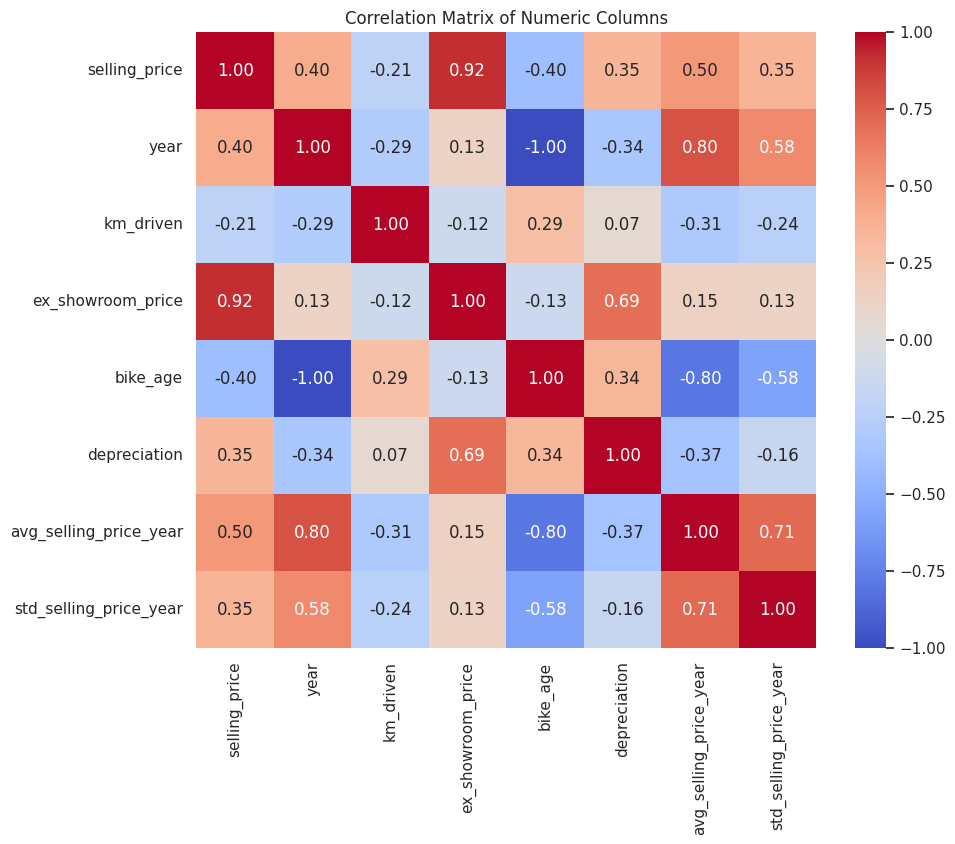

In [26]:
#Ans
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

**EDA 2- CAR SALES DATASET**

Qns-1 What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [30]:
#Ans
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Load the CSV file
df = pd.read_csv('Car Sale.csv')
 #Display the first few rows and column information to understand the dataset
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

Saving Car Sale.csv to Car Sale (2).csv
| Car_id       | Date     | Customer Name   | Gender   | Annual Income   | Dealer_Name                         | Company   | Model      | Engine                    | Transmission   | Color      | Price ($)   | Dealer_No    | Body Style   | Phone   | Dealer_Region   |
|:-------------|:---------|:----------------|:---------|:----------------|:------------------------------------|:----------|:-----------|:--------------------------|:---------------|:-----------|:------------|:-------------|:-------------|:--------|:----------------|
| C_CND_000001 | 1/2/2022 | Geraldine       | Male     | 13500           | Buddy Storbeck's Diesel Service Inc | Ford      | Expedition | DoubleÂ Overhead Camshaft | Auto           | Black      | 26000       | 06457-3834   | SUV          | 8264678 | Middletown      |
| C_CND_000002 | 1/2/2022 | Gia             | Male     | 1480000         | C & M Motors Inc                    | Dodge     | Durango    | DoubleÂ Overhead C

Qns-2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [31]:
#Ans
# Group by 'Company' and calculate the standard deviation of 'Price ($)'
price_variation_by_company = df.groupby('Company')['Price ($)'].std().reset_index()

# Rename the column for clarity
price_variation_by_company.rename(columns={'Price ($)': 'Price_Standard_Deviation'}, inplace=True)

# Sort the results by standard deviation in descending order to find the highest variation
highest_variation_company = price_variation_by_company.sort_values(by='Price_Standard_Deviation', ascending=False)

# Display the company with the highest variation
print("Car brand with the highest variation in prices:")
print(highest_variation_company.head(1).to_markdown(index=False, numalign="left", stralign="left"))

Car brand with the highest variation in prices:
| Company   | Price_Standard_Deviation   |
|:----------|:---------------------------|
| Lincoln   | 19658.1                    |


Qns-3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

In [32]:
#Ans
# Group by 'Transmission' and calculate descriptive statistics for 'Price ($)'
price_distribution_by_transmission = df.groupby('Transmission')['Price ($)'].describe().reset_index()

# Calculate Q1, Q3, and IQR
price_distribution_by_transmission['Q1'] = price_distribution_by_transmission['25%']
price_distribution_by_transmission['Q3'] = price_distribution_by_transmission['75%']
price_distribution_by_transmission['IQR'] = price_distribution_by_transmission['Q3'] - price_distribution_by_transmission['Q1']

# Select relevant columns for display
display_columns = ['Transmission', 'count', 'mean', 'std', 'min', 'Q1', '50%', 'Q3', 'max', 'IQR']
price_distribution_by_transmission = price_distribution_by_transmission[display_columns]

# Rename '50%' to 'median' for clarity
price_distribution_by_transmission.rename(columns={'50%': 'median'}, inplace=True)

# Display the results
print("Distribution of car prices for each transmission type:")
print(price_distribution_by_transmission.to_markdown(index=False, numalign="left", stralign="left"))

Distribution of car prices for each transmission type:
| Transmission   | count   | mean    | std     | min   | Q1    | median   | Q3    | max   | IQR   |
|:---------------|:--------|:--------|:--------|:------|:------|:---------|:------|:------|:------|
| Auto           | 12571   | 28248.5 | 13747.1 | 1200  | 19000 | 24000    | 35500 | 75700 | 16500 |
| Manual         | 11335   | 27914.7 | 15862.9 | 1700  | 17000 | 22001    | 34000 | 85800 | 17000 |


Qns-4 What is the distribution of car prices across different regions?

In [33]:
#Ans
# Group by 'Dealer_Region' and calculate descriptive statistics for 'Price ($)'
price_distribution_by_region = df.groupby('Dealer_Region')['Price ($)'].describe().reset_index()

# Calculate Q1, Q3, and IQR
price_distribution_by_region['Q1'] = price_distribution_by_region['25%']
price_distribution_by_region['Q3'] = price_distribution_by_region['75%']
price_distribution_by_region['IQR'] = price_distribution_by_region['Q3'] - price_distribution_by_region['Q1']

# Select relevant columns for display
display_columns = ['Dealer_Region', 'count', 'mean', 'std', 'min', 'Q1', '50%', 'Q3', 'max', 'IQR']
price_distribution_by_region = price_distribution_by_region[display_columns]

# Rename '50%' to 'median' for clarity
price_distribution_by_region.rename(columns={'50%': 'median'}, inplace=True)

# Display the results
print("Distribution of car prices across different regions:")
print(price_distribution_by_region.to_markdown(index=False, numalign="left", stralign="left"))

Distribution of car prices across different regions:
| Dealer_Region   | count   | mean    | std     | min   | Q1      | median   | Q3    | max   | IQR     |
|:----------------|:--------|:--------|:--------|:------|:--------|:---------|:------|:------|:--------|
| Aurora          | 3130    | 28334.6 | 15026.2 | 9000  | 18001   | 23000    | 35000 | 85800 | 16999   |
| Austin          | 4135    | 28341.6 | 14903.9 | 9000  | 18001   | 23801    | 35001 | 85601 | 17000   |
| Greenville      | 3128    | 28180.8 | 15101.5 | 1200  | 18001   | 22500    | 34500 | 85200 | 16499   |
| Janesville      | 3821    | 27833.4 | 14345   | 4300  | 18001   | 23000    | 34000 | 85400 | 15999   |
| Middletown      | 3128    | 27856.3 | 14619.8 | 1700  | 18000   | 22750    | 34000 | 85300 | 16000   |
| Pasco           | 3131    | 28119   | 14659.3 | 9000  | 18500.5 | 23000    | 34000 | 85600 | 15499.5 |
| Scottsdale      | 3433    | 27955   | 14902.9 | 1450  | 18000   | 22600    | 33500 | 85001 | 15500   |


Qns-5 What is the distribution of cars based on body styles?

In [34]:
#Ans
# Calculate the count of each 'Body Style'
body_style_distribution = df['Body Style'].value_counts().reset_index()
body_style_distribution.columns = ['Body_Style', 'Count']

# Calculate the percentage of each 'Body Style'
body_style_distribution['Percentage'] = (body_style_distribution['Count'] / len(df)) * 100

# Sort the results by count in descending order
body_style_distribution = body_style_distribution.sort_values(by='Count', ascending=False)

# Display the distribution
print("Distribution of cars based on Body Styles:")
print(body_style_distribution.to_markdown(index=False, numalign="left", stralign="left"))

Distribution of cars based on Body Styles:
| Body_Style   | Count   | Percentage   |
|:-------------|:--------|:-------------|
| SUV          | 6374    | 26.6628      |
| Hatchback    | 6128    | 25.6337      |
| Sedan        | 4488    | 18.7735      |
| Passenger    | 3945    | 16.5021      |
| Hardtop      | 2971    | 12.4278      |


Qns-6 How does the average selling price of cars vary by customer gender and annual income

In [35]:
#Ans
# Part 1: Average selling price by Gender
average_price_by_gender = df.groupby('Gender')['Price ($)'].mean().reset_index()
print("Average selling price of cars by Customer Gender:")
print(average_price_by_gender.to_markdown(index=False, numalign="left", stralign="left"))

# Part 2: Average selling price by Annual Income (using bins)
# Define income bins and labels
income_bins = [0, 500000, 1000000, 1500000, df['Annual Income'].max()]
income_labels = ['0-500K', '500K-1M', '1M-1.5M', '>1.5M']
df['Income_Group'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels, right=False)

# Calculate the average selling price for each income group
average_price_by_income = df.groupby('Income_Group')['Price ($)'].mean().reset_index()
print("\nAverage selling price of cars by Annual Income Group:")
print(average_price_by_income.to_markdown(index=False, numalign="left", stralign="left"))

Average selling price of cars by Customer Gender:
| Gender   | Price ($)   |
|:---------|:------------|
| Female   | 28277.3     |
| Male     | 28039.4     |

Average selling price of cars by Annual Income Group:
| Income_Group   | Price ($)   |
|:---------------|:------------|
| 0-500K         | 28063.3     |
| 500K-1M        | 27987       |
| 1M-1.5M        | 28280       |
| >1.5M          | 28177.6     |


<ipython-input-35-d206c87c0643>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_income = df.groupby('Income_Group')['Price ($)'].mean().reset_index()


Qns-7 What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [36]:
#Ans
import pandas as pd

# Load the 'Car Sale.csv' file
df = pd.read_csv('Car Sale.csv')

# --- Distribution of car prices across different regions ---
print("--- Distribution of car prices across different regions ---")
price_distribution_by_region = df.groupby('Dealer_Region')['Price ($)'].describe().reset_index()
price_distribution_by_region['Q1'] = price_distribution_by_region['25%']
price_distribution_by_region['Q3'] = price_distribution_by_region['75%']
price_distribution_by_region['IQR'] = price_distribution_by_region['Q3'] - price_distribution_by_region['Q1']
display_columns_region = ['Dealer_Region', 'count', 'mean', 'std', 'min', 'Q1', '50%', 'Q3', 'max', 'IQR']
price_distribution_by_region = price_distribution_by_region[display_columns_region]
price_distribution_by_region.rename(columns={'50%': 'median'}, inplace=True)
print(price_distribution_by_region.to_markdown(index=False, numalign="left", stralign="left"))
print("\n" + "-"*30 + "\n")

# --- Number of cars sold vary by region ---
print("--- Number of cars sold by region ---")
cars_sold_by_region = df['Dealer_Region'].value_counts().reset_index()
cars_sold_by_region.columns = ['Dealer_Region', 'Count']
cars_sold_by_region = cars_sold_by_region.sort_values(by='Count', ascending=False)
print(cars_sold_by_region.to_markdown(index=False, numalign="left", stralign="left"))
print("\n" + "-"*30 + "\n")

--- Distribution of car prices across different regions ---
| Dealer_Region   | count   | mean    | std     | min   | Q1      | median   | Q3    | max   | IQR     |
|:----------------|:--------|:--------|:--------|:------|:--------|:---------|:------|:------|:--------|
| Aurora          | 3130    | 28334.6 | 15026.2 | 9000  | 18001   | 23000    | 35000 | 85800 | 16999   |
| Austin          | 4135    | 28341.6 | 14903.9 | 9000  | 18001   | 23801    | 35001 | 85601 | 17000   |
| Greenville      | 3128    | 28180.8 | 15101.5 | 1200  | 18001   | 22500    | 34500 | 85200 | 16499   |
| Janesville      | 3821    | 27833.4 | 14345   | 4300  | 18001   | 23000    | 34000 | 85400 | 15999   |
| Middletown      | 3128    | 27856.3 | 14619.8 | 1700  | 18000   | 22750    | 34000 | 85300 | 16000   |
| Pasco           | 3131    | 28119   | 14659.3 | 9000  | 18500.5 | 23000    | 34000 | 85600 | 15499.5 |
| Scottsdale      | 3433    | 27955   | 14902.9 | 1450  | 18000   | 22600    | 33500 | 85001 | 15500

Qns-8 How does the average car price differ between cars with different engine sizes

In [37]:
#Ans
# Group by 'Engine' and calculate the average 'Price ($)'
average_price_by_engine = df.groupby('Engine')['Price ($)'].mean().reset_index()

# Sort the results by average price in descending order
average_price_by_engine = average_price_by_engine.sort_values(by='Price ($)', ascending=False)

# Display the results
print("Average car price for each engine size:")
print(average_price_by_engine.to_markdown(index=False, numalign="left", stralign="left"))

Average car price for each engine size:
| Engine                    | Price ($)   |
|:--------------------------|:------------|
| DoubleÂ Overhead Camshaft | 28248.5     |
| Overhead Camshaft         | 27914.7     |


Qns-9 How do car prices vary based on the customer’s annual income bracket

In [39]:
#Ans

import pandas as pd

# Load the 'Car Sale.csv' file
df = pd.read_csv('Car Sale.csv')

# --- Average selling price of cars by Annual Income Group ---
print("--- Average selling price of cars by Annual Income Group ---")
# Define income bins and labels
income_bins = [0, 500000, 1000000, 1500000, df['Annual Income'].max() + 1] # Added +1 to max to ensure all values are covered
income_labels = ['0-500K', '500K-1M', '1M-1.5M', '>1.5M']
df['Income_Group'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels, right=False)

# Calculate the average selling price for each income group
average_price_by_income = df.groupby('Income_Group')['Price ($)'].mean().reset_index()
print(average_price_by_income.to_markdown(index=False, numalign="left", stralign="left"))

--- Average selling price of cars by Annual Income Group ---
| Income_Group   | Price ($)   |
|:---------------|:------------|
| 0-500K         | 28063.3     |
| 500K-1M        | 27987       |
| 1M-1.5M        | 28280       |
| >1.5M          | 28176.9     |


<ipython-input-39-63776b36af9b>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_income = df.groupby('Income_Group')['Price ($)'].mean().reset_index()


QnsWhat are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [40]:
#Ans
# 1. Identify Top 5 Models by Sales
model_sales = df['Model'].value_counts().reset_index()
model_sales.columns = ['Model', 'Sales_Count']
top_5_models = model_sales.head(5)

print("Top 5 Car Models with the Highest Number of Sales:")
print(top_5_models.to_markdown(index=False, numalign="left", stralign="left"))
print("\n" + "-"*30 + "\n")

# 2. Analyze Price Distribution for Top 5 Models
# Get the names of the top 5 models
top_5_model_names = top_5_models['Model'].tolist()

# Filter the original DataFrame for only these top 5 models
df_top_5_models = df[df['Model'].isin(top_5_model_names)]

# Calculate descriptive statistics for 'Price ($)' for these top models
price_distribution_top_models = df_top_5_models.groupby('Model')['Price ($)'].describe().reset_index()

# Calculate Q1, Q3, and IQR for each model
price_distribution_top_models['Q1'] = price_distribution_top_models['25%']
price_distribution_top_models['Q3'] = price_distribution_top_models['75%']
price_distribution_top_models['IQR'] = price_distribution_top_models['Q3'] - price_distribution_top_models['Q1']

# Select relevant columns for display and rename '50%' to 'median'
display_columns_price = ['Model', 'count', 'mean', 'std', 'min', 'Q1', '50%', 'Q3', 'max', 'IQR']
price_distribution_top_models = price_distribution_top_models[display_columns_price]
price_distribution_top_models.rename(columns={'50%': 'median'}, inplace=True)

print("Price Distribution for Top 5 Car Models:")
print(price_distribution_top_models.to_markdown(index=False, numalign="left", stralign="left"))

Top 5 Car Models with the Highest Number of Sales:
| Model      | Sales_Count   |
|:-----------|:--------------|
| Diamante   | 418           |
| Prizm      | 411           |
| Silhouette | 411           |
| Passat     | 391           |
| Ram Pickup | 383           |

------------------------------

Price Distribution for Top 5 Car Models:
| Model      | count   | mean    | std     | min   | Q1    | median   | Q3    | max   | IQR   |
|:-----------|:--------|:--------|:--------|:------|:------|:---------|:------|:------|:------|
| Diamante   | 418     | 22268.3 | 9770.77 | 12000 | 18000 | 19001    | 22000 | 49801 | 4000  |
| Passat     | 391     | 19600.7 | 8218.52 | 9000  | 12001 | 20000    | 27001 | 32501 | 15000 |
| Prizm      | 411     | 22838.5 | 8012.53 | 15000 | 16000 | 22000    | 25000 | 44700 | 9000  |
| Ram Pickup | 383     | 27820.9 | 13297.6 | 16000 | 19000 | 21000    | 39300 | 57750 | 20300 |
| Silhouette | 411     | 29858.5 | 17940.6 | 12000 | 14001 | 25000    | 34500 | 60

Qns  How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

In [41]:
#Ans
# Group by 'Color' and 'Engine' to find the average price for each combination
average_price_by_color_engine = df.groupby(['Color', 'Engine'])['Price ($)'].mean().reset_index()

# Rename the 'Price ($)' column for clarity
average_price_by_color_engine.rename(columns={'Price ($)': 'Average_Price'}, inplace=True)

print("Average car price by Color and Engine Type:")
print(average_price_by_color_engine.to_markdown(index=False, numalign="left", stralign="left"))
print("\n" + "-"*30 + "\n")

# Calculate price variation (standard deviation) for each 'Color'
price_variation_by_color = df.groupby('Color')['Price ($)'].std().reset_index()

# Rename the 'Price ($)' column for clarity
price_variation_by_color.rename(columns={'Price ($)': 'Price_Standard_Deviation'}, inplace=True)

# Sort by standard deviation in descending order to find colors with highest variation
highest_price_variation_colors = price_variation_by_color.sort_values(by='Price_Standard_Deviation', ascending=False)

print("Colors with the highest price variation (Standard Deviation):")
print(highest_price_variation_colors.to_markdown(index=False, numalign="left", stralign="left"))

Average car price by Color and Engine Type:
| Color      | Engine                    | Average_Price   |
|:-----------|:--------------------------|:----------------|
| Black      | DoubleÂ Overhead Camshaft | 25766.5         |
| Black      | Overhead Camshaft         | 31733           |
| Pale White | DoubleÂ Overhead Camshaft | 30348           |
| Pale White | Overhead Camshaft         | 24327.8         |
| Red        | DoubleÂ Overhead Camshaft | 27434.4         |
| Red        | Overhead Camshaft         | 30153.4         |

------------------------------

Colors with the highest price variation (Standard Deviation):
| Color      | Price_Standard_Deviation   |
|:-----------|:---------------------------|
| Red        | 15519.4                    |
| Black      | 15286.1                    |
| Pale White | 14077.3                    |


Qns-12 Is there any seasonal trend in car sales based on the date of sale

Monthly Sales Trend:
| Month   | Sales_Count   |
|:--------|:--------------|
| 1       | 790           |
| 2       | 735           |
| 3       | 1535          |
| 4       | 1655          |
| 5       | 1895          |
| 6       | 1715          |
| 7       | 1725          |
| 8       | 1705          |
| 9       | 3305          |
| 10      | 1830          |
| 11      | 3470          |
| 12      | 3546          |


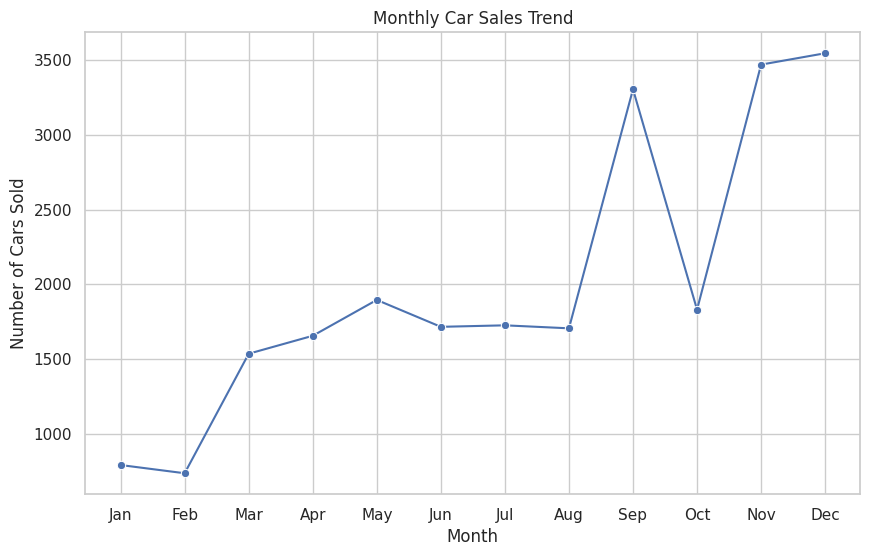

In [42]:
#Ans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and quarter from the 'Date'
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Calculate sales by month
monthly_sales = df['Month'].value_counts().sort_index().reset_index()
monthly_sales.columns = ['Month', 'Sales_Count']



print("Monthly Sales Trend:")
print(monthly_sales.to_markdown(index=False, numalign="left", stralign="left"))



# Visualize monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales_Count', data=monthly_sales, marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()



Qns13- How does the car price distribution change when considering different combinations of body style and
transmission type

In [43]:
#Ans
# Group by 'Body Style' and 'Transmission' and calculate descriptive statistics for 'Price ($)'
price_distribution_by_style_transmission = df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe().reset_index()

# Calculate Q1, Q3, and IQR
price_distribution_by_style_transmission['Q1'] = price_distribution_by_style_transmission['25%']
price_distribution_by_style_transmission['Q3'] = price_distribution_by_style_transmission['75%']
price_distribution_by_style_transmission['IQR'] = price_distribution_by_style_transmission['Q3'] - price_distribution_by_style_transmission['Q1']

# Select relevant columns for display
display_columns = ['Body Style', 'Transmission', 'count', 'mean', 'std', 'min', 'Q1', '50%', 'Q3', 'max', 'IQR']
price_distribution_by_style_transmission = price_distribution_by_style_transmission[display_columns]

# Rename '50%' to 'median' for clarity
price_distribution_by_style_transmission.rename(columns={'50%': 'median'}, inplace=True)

# Display the results
print("Distribution of car prices by Body Style and Transmission Type:")
print(price_distribution_by_style_transmission.to_markdown(index=False, numalign="left", stralign="left"))

Distribution of car prices by Body Style and Transmission Type:
| Body Style   | Transmission   | count   | mean    | std     | min   | Q1      | median   | Q3    | max   | IQR     |
|:-------------|:---------------|:--------|:--------|:--------|:------|:--------|:---------|:------|:------|:--------|
| Hardtop      | Auto           | 1408    | 31520.2 | 13687.8 | 12000 | 21001   | 27000    | 43125 | 75501 | 22124   |
| Hardtop      | Manual         | 1563    | 27016.9 | 14072.5 | 11000 | 17575.5 | 22001    | 29000 | 82500 | 11424.5 |
| Hatchback    | Auto           | 3458    | 25910.5 | 13144   | 4200  | 18001   | 21500    | 31000 | 75700 | 12999   |
| Hatchback    | Manual         | 2670    | 28702.6 | 16284   | 1700  | 17000   | 23000    | 36001 | 85600 | 19001   |
| Passenger    | Auto           | 2020    | 28915.8 | 13946.5 | 9000  | 19000   | 25000    | 38000 | 69801 | 19000   |
| Passenger    | Manual         | 1925    | 28969.5 | 18523.7 | 10000 | 16001   | 22000    | 37000 | 85

Qns-14 What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact

In [44]:
# Calculate the Pearson correlation between 'Price ($)' and 'Annual Income'
correlation_price_income = df['Price ($)'].corr(df['Annual Income'])

print(f"Correlation between Car Price and Annual Income: {correlation_price_income:.2f}")
print("\n" + "-"*30 + "\n")

# Analyze average price by 'Engine' and 'Annual Income' Group
# Re-use the Income_Group bins from previous steps
# Define income bins and labels (ensure consistency or re-define if not in current session)
if 'Income_Group' not in df.columns:
    income_bins = [0, 500000, 1000000, 1500000, df['Annual Income'].max() + 1]
    income_labels = ['0-500K', '500K-1M', '1M-1.5M', '>1.5M']
    df['Income_Group'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels, right=False)

average_price_by_engine_income = df.groupby(['Engine', 'Income_Group'])['Price ($)'].mean().reset_index()

print("Average car price by Engine Type and Annual Income Group:")
print(average_price_by_engine_income.to_markdown(index=False, numalign="left", stralign="left"))

Correlation between Car Price and Annual Income: 0.01

------------------------------

Average car price by Engine Type and Annual Income Group:
| Engine                    | Income_Group   | Price ($)   |
|:--------------------------|:---------------|:------------|
| DoubleÂ Overhead Camshaft | 0-500K         | 28264.6     |
| DoubleÂ Overhead Camshaft | 500K-1M        | 27938.5     |
| DoubleÂ Overhead Camshaft | 1M-1.5M        | 28552.2     |
| DoubleÂ Overhead Camshaft | >1.5M          | 28639.6     |
| Overhead Camshaft         | 0-500K         | 27840.6     |
| Overhead Camshaft         | 500K-1M        | 28040.9     |
| Overhead Camshaft         | 1M-1.5M        | 27979.9     |
| Overhead Camshaft         | >1.5M          | 27659.2     |


<ipython-input-44-7ffacec96515>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_engine_income = df.groupby(['Engine', 'Income_Group'])['Price ($)'].mean().reset_index()


Qns-15 How does the average car price vary across different car models and engine types?

In [45]:
# Group by 'Model' and 'Engine' and calculate the average 'Price ($)'
average_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Rename the 'Price ($)' column for clarity
average_price_by_model_engine.rename(columns={'Price ($)': 'Average_Price'}, inplace=True)

# Sort the results by Average_Price in descending order for better insights
average_price_by_model_engine = average_price_by_model_engine.sort_values(by='Average_Price', ascending=False)

# Display the results
# Due to potentially large number of combinations, I will display the top 20 rows
# and a summary of the distribution of average prices.
print("Average car price by Car Model and Engine Type (Top 20 combinations):")
print(average_price_by_model_engine.head(20).to_markdown(index=False, numalign="left", stralign="left"))

print("\nBasic statistics of average prices across Model and Engine combinations:")
print(average_price_by_model_engine['Average_Price'].describe().to_markdown(numalign="left", stralign="left"))

Average car price by Car Model and Engine Type (Top 20 combinations):
| Model         | Engine                    | Average_Price   |
|:--------------|:--------------------------|:----------------|
| SC            | Overhead Camshaft         | 61074.8         |
| Ranger        | DoubleÂ Overhead Camshaft | 61064.1         |
| Sable         | Overhead Camshaft         | 61039.8         |
| Catera        | DoubleÂ Overhead Camshaft | 56836.9         |
| LX470         | Overhead Camshaft         | 54037.5         |
| LS400         | Overhead Camshaft         | 53157.9         |
| GS400         | Overhead Camshaft         | 53086           |
| Tacoma        | DoubleÂ Overhead Camshaft | 53085.8         |
| Aurora        | Overhead Camshaft         | 51833.6         |
| Park Avenue   | DoubleÂ Overhead Camshaft | 49387.8         |
| Outback       | Overhead Camshaft         | 49110.3         |
| LHS           | Overhead Camshaft         | 47954.4         |
| Taurus        | Overhead Camshaf